## Import Parameter

### Classes Import

In [1]:
import os
import math
import pandas as pd
import random
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
from scipy import sparse
from scipy.optimize import curve_fit

### Ploting Import

In [2]:
## Basic parameter
cnames = {                        
'blueviolet':           '#8A2BE2',
'brown':                '#A52A2A',
'burlywood':            '#DEB887',
'cadetblue':            '#5F9EA0',
'chocolate':            '#D2691E',
'crimson':              '#DC143C',
'cyan':                 '#00FFFF',
'darkblue':             '#00008B',
'darkcyan':             '#008B8B',
'darkolivegreen':       '#556B2F',
'darkorange':           '#FF8C00',
'darksalmon':           '#E9967A',
'darkseagreen':         '#8FBC8F',
'darkslateblue':        '#483D8B',
'darkslategray':        '#2F4F4F',
'darkturquoise':        '#00CED1',
'darkviolet':           '#9400D3',
'deeppink':             '#FF1493',
'deepskyblue':          '#00BFFF',
'dimgray':              '#696969',
'dodgerblue':           '#1E90FF',
'firebrick':            '#B22222',
'floralwhite':          '#FFFAF0',
'forestgreen':          '#228B22',
'fuchsia':              '#FF00FF',
'gainsboro':            '#DCDCDC',
'ghostwhite':           '#F8F8FF',
'gold':                 '#FFD700',
'greenyellow':          '#ADFF2F',
'honeydew':             '#F0FFF0',
'hotpink':              '#FF69B4',
'indianred':            '#CD5C5C',
'indigo':               '#4B0082',
'ivory':                '#FFFFF0',
'khaki':                '#F0E68C',
'orangered':            '#FF4500',
'orchid':               '#DA70D6'}
carr = []
for cmap in cnames.keys():                          ## color array
    carr.append(cmap)
marr = ['o-', 'x-', '^-', 's-', 'p-', '*-', 'h-']   ## marker array

## Pauli matrix ( normal and sparse )

In [3]:
j = 1
h = 0.5
hbar = 1
SigmaX = np.array([[0,1],[1,0]])
SigmaY = np.array([[0,-1j],[1j,0]])
SigmaZ = np.array([[1,0],[0,-1]])
sparseSigmaX = sparse.csr_matrix([[0,1],[1,0]]).astype(float)
sparseSigmaY = sparse.csr_matrix([[0,-1j],[1j,0]]).astype(float)
sparseSigmaZ = sparse.csr_matrix([[1,0],[0,-1]]).astype(float)
Sx = hbar/2*SigmaX
Sy = hbar/2*SigmaY
Sz = hbar/2*SigmaZ
sparseSx = hbar/2*sparseSigmaX
sparseSy = hbar/2*sparseSigmaY
sparseSz = hbar/2*sparseSigmaZ
I = np.array([[1,0],[0,1]])
sparseI = sparse.csr_matrix(I).astype(float)



/home/aronton/anaconda3/lib/python3.9/site-packages/scipy/sparse/data.py:72: ComplexWarning: Casting complex values to real discards the imaginary part
  self._deduped_data().astype(dtype, casting=casting, copy=copy),


## Hamiltonian Function

In [4]:
def Hamiltonain(L,Sx,Sy,Sz,I,j,hx,hz):

    Sxtot = np.zeros((2**L, 2**L))
    Sytot = np.zeros((2**L, 2**L))
    Sztot = np.zeros((2**L, 2**L))
    Htot = np.zeros((2**L, 2**L))
    SxList = []
    SyList = []
    SzList = []

    for k in range(L):
        x = Sx
        y = Sy
        z = Sz
        if(k == 0):
            for i in range(L-1):
                x = np.kron(x,I)
                y = np.kron(y,I)
                z = np.kron(z,I)
            SxList.append(x)
            SyList.append(y)
            SzList.append(z)
        elif(k == L-1):
            for i in range(L-1):
                x = np.kron(I,x)
                y = np.kron(I,y)
                z = np.kron(I,z)
            SxList.append(x)
            SyList.append(y)
            SzList.append(z)
        else:
            for i in range(k):
                x = np.kron(I,x)
                y = np.kron(I,y)
                z = np.kron(I,z)
            for i in range(k, L-1):
                x = np.kron(x,I)
                y = np.kron(y,I)
                z = np.kron(z,I)
            SxList.append(x)
            SyList.append(y)
            SzList.append(z)

    # for i in range(L):
    #     if i < L-1:
    #         Htot = Htot - j*SxList[i] @ SxList[i+1] - hz*SzList[i] - 1j*hx*SxList[i]
    #     else:
    #         Htot = Htot - j*SxList[i] @ SxList[0] - hz*SzList[i] - 1j*hx*SxList[i]

    if(hx == 0):
        for i in range(L):
            if i < L-1:
                Htot = Htot - j*SxList[i] @ SxList[i+1] - hz*SzList[i] 
            else:
                Htot = Htot - j*SxList[i] @ SxList[0] - hz*SzList[i] 
    else:
        for i in range(L):
            if i < L-1:
                Htot = Htot - j*SxList[i] @ SxList[i+1] - hz*SzList[i] - 1j*hx*SxList[i]
            else:
                Htot = Htot - j*SxList[i] @ SxList[0] - hz*SzList[i] - 1j*hx*SxList[i]

    for i in range(L):
        Sxtot = Sxtot + SxList[i]
        Sytot = Sytot + SyList[i]
        Sztot = Sztot + SzList[i]
    
    return Htot, Sztot, SzList, Sxtot, SxList


def sparseHamiltonain(L,sparseSx,sparseSy,sparseSz,sparseI,j,hx,hz):

    Sxtot = sparse.csr_matrix((2**L, 2**L)).astype(float)
    Sytot = sparse.csr_matrix((2**L, 2**L)).astype(float)
    Sztot = sparse.csr_matrix((2**L, 2**L)).astype(float)
    Htot = sparse.csr_matrix((2**L, 2**L)).astype(float)
    SxList = []
    SyList = []
    SzList = []

    for k in range(L):
        x = sparseSx
        y = sparseSy
        z = sparseSz
        if(k == 0):
            for i in range(L-1):
                x = sparse.kron(x,sparseI,format = 'csr')
                y = sparse.kron(y,sparseI,format = 'csr')
                z = sparse.kron(z,sparseI,format = 'csr')
            SxList.append(x)
            SyList.append(y)
            SzList.append(z)
        elif(k == L-1):
            for i in range(L-1):
                x = sparse.kron(sparseI,x,format = 'csr')
                y = sparse.kron(sparseI,y,format = 'csr')
                z = sparse.kron(sparseI,z,format = 'csr')
            SxList.append(x)
            SyList.append(y)
            SzList.append(z)
        else:
            for i in range(k):
                x = sparse.kron(sparseI,x,format = 'csr')
                y = sparse.kron(sparseI,y,format = 'csr')
                z = sparse.kron(sparseI,z,format = 'csr')
            for i in range(k, L-1):
                x = sparse.kron(x,sparseI,format = 'csr')
                y = sparse.kron(y,sparseI,format = 'csr')
                z = sparse.kron(z,sparseI,format = 'csr')
            SxList.append(x)
            SyList.append(y)
            SzList.append(z)

    if(hx == 0):
        for i in range(L):
            if i < L-1:
                Htot = Htot - j*SxList[i] @ SxList[i+1] - hz*SzList[i] 
            else:
                Htot = Htot - j*SxList[i] @ SxList[0] - hz*SzList[i] 
    else:
        for i in range(L):
            if i < L-1:
                Htot = Htot - j*SxList[i] @ SxList[i+1] - hz*SzList[i] - 1j*hx*SxList[i]
            else:
                Htot = Htot - j*SxList[i] @ SxList[0] - hz*SzList[i] - 1j*hx*SxList[i]


    for i in range(L):
        Sxtot = Sxtot + SxList[i]
        Sytot = Sytot + SyList[i]
        Sztot = Sztot + SzList[i]

    return Htot, Sztot, SzList, Sxtot, SxList
    
   

In [25]:
for i in range(100):
    Htot, Sztot, SzList, Sxtot, SxList = sparseHamiltonain(18,sparseSx,sparseSy,sparseSz,sparseI,1,0,0.1)

## 實數 Hamiltonian 做 ED

## Real Hamiltonian using dense matrix

### Calculation

In [5]:
Llist = np.linspace(4,10,(12-4)//2,dtype = int)
print(Llist)
hz = np.linspace(0,1,11)
E0 = np.zeros((len(Llist),len(hz)))
E1 = np.zeros((len(Llist),len(hz)))
entropy = []
np.zeros((len(Llist),len(Llist) + 1))
gap = np.zeros((len(Llist),len(hz)))
lamda = np.zeros((len(Llist),len(hz)))
SzE = np.zeros((len(Llist),len(hz)))
SxE = np.zeros((len(Llist),len(hz)))


for l in range(len(Llist)):
    L = Llist[l]
    entropy.append(np.zeros((L+1,len(hz))))
    for hz_i in range(len(hz)):
        H,ztot,zlist,xtot,xList = Hamiltonain(L,Sx,Sy,Sz,I,1,0,hz[hz_i])
        ee, v = la.eigh(H)
        eex, vx = la.eigh(H + 0.01*xtot)
        E0[l,hz_i] = ee[0]/L
        E1[l,hz_i] = ee[1]/L
        gap[l,hz_i] = ee[1] - ee[0]
        lamda[l,hz_i] = 1/(ee[1] - ee[0])/L
        SzE[l,hz_i] = v[:,0] @ zlist[0]  @ v[:,0]
        SxE[l,hz_i] = vx[:,0] @ xList[0]  @ vx[:,0]
        Na = np.linspace(0,L,L+1,dtype = int)
        for na in range(len(Na)):
            rv = np.reshape(v[:,0], (2**Na[na],2**(L-Na[na])))
            s = np.linalg.svd(rv,  compute_uv=False)
            for svalue in s:
                entropy[l][na,hz_i] = entropy[l][na,hz_i] - (svalue)*(svalue)*np.log(svalue*svalue)


[ 4  6  8 10]


/tmp/ipykernel_10566/3059797858.py:24: RuntimeWarning: divide by zero encountered in double_scalars
  lamda[l,hz_i] = 1/(ee[1] - ee[0])/L


### Data Plot

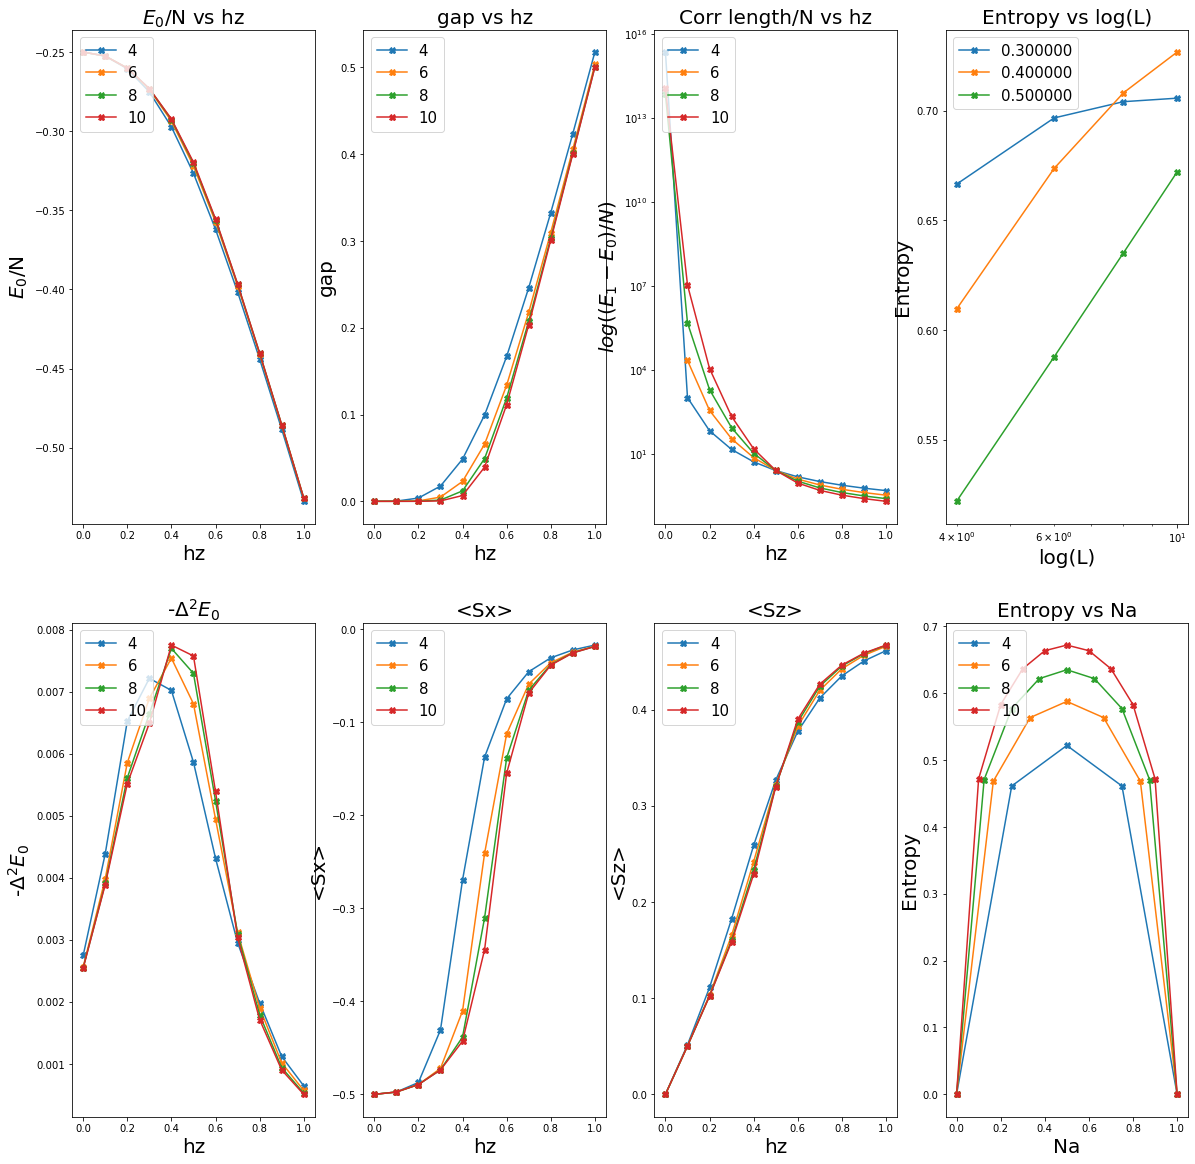

In [6]:
fig, ax = plt.subplots(2,4,figsize=(20,20))
entropyForAsize = np.zeros((len(Llist),len(hz)))
for l in range(len(Llist)):
    L = Llist[l]
    ax[0][0].plot(hz[:],E0[l,:], "-X", label = "%d" %L)
    ax[0][0].set_title("$E_0$/N vs hz", fontsize = 20)
    ax[0][0].set_ylabel("$E_0$/N", fontsize = 20)
    ax[0][0].set_xlabel("hz", fontsize = 20)
    ax[0][0].legend(loc = "upper left", fontsize=15)

    ax[0][1].plot(hz[:],gap[l,:], "-X", label = "%d" %L)
    ax[0][1].set_title("gap vs hz", fontsize = 20)
    ax[0][1].set_ylabel("gap", fontsize = 20)
    ax[0][1].set_xlabel("hz", fontsize = 20)
    ax[0][1].legend(loc = "upper left", fontsize=15)

    ax[0][2].plot(hz[:],lamda[l,:], "-X", label = "%d" %L)
    ax[0][2].set_title("Corr length/N vs hz", fontsize = 20)
    ax[0][2].legend(loc = "upper left", fontsize=15)
    ax[0][2].set_ylabel("$log((E_1-E_0)/N)$", fontsize = 20)
    ax[0][2].set_xlabel("hz", fontsize = 20)
    ax[0][2].set_yscale('log')

    ax[1][0].plot(hz[:], -np.gradient(np.gradient(E0[l,:])), "-X", label = "%d" %L)
    ax[1][0].set_title("-$\Delta^2E_0$", fontsize = 20)
    ax[1][0].set_ylabel("-$\Delta^2E_0$", fontsize = 20)
    ax[1][0].set_xlabel("hz", fontsize = 20)
    ax[1][0].legend(loc = "upper left", fontsize=15)

    ax[1][1].plot(hz[:], SxE[l,:], "-X", label = "%d" %L)
    ax[1][1].set_title("<Sx>", fontsize = 20)
    ax[1][1].set_ylabel("<Sx>", fontsize = 20)
    ax[1][1].set_xlabel("hz", fontsize = 20)
    ax[1][1].legend(loc = "upper left", fontsize=15)

    ax[1][2].plot(hz[:], SzE[l,:], "-X", label = "%d" %L)
    ax[1][2].set_title("<Sz>", fontsize = 20)
    ax[1][2].set_ylabel("<Sz>", fontsize = 20)
    ax[1][2].set_xlabel("hz", fontsize = 20)
    ax[1][2].legend(loc = "upper left", fontsize=15)

    for h in range(len(hz)):
        entropyForAsize[l,h] = entropy[l][Llist[l]//2,h]


for hz_i in range(len(hz[0:(len(hz)+1)//2])):
    if(hz_i >= (len(hz)-1)//2 - 2):
        ax[0][3].plot(Llist[:],entropyForAsize[:,hz_i], "-X", label = "%f" %(hz[hz_i]))
        ax[0][3].set_ylabel("Entropy", fontsize = 20)
        ax[0][3].set_xlabel("log(L)", fontsize = 20)
        ax[0][3].set_title("Entropy vs log(L)", fontsize = 20)
        ax[0][3].legend(loc = "upper left", fontsize=15)
        ax[0][3].set_xscale('log')
    
for l in range(len(Llist)):
    Na = np.linspace(max(Llist)//2 - Llist[l]//2,max(Llist)//2 + Llist[l]//2,Llist[l]+1)
    SNa = []
    for i in range(len(Na)):
        SNa.append((Na[i]-Na[0])/(Na[-1]-Na[0]))
    ax[1][3].plot(SNa[:],entropy[l][:,hz_i], "-X", label = "%d" %(Llist[l]))
    ax[1][3].set_ylabel("Entropy", fontsize = 20)
    ax[1][3].set_xlabel("Na", fontsize = 20)
    ax[1][3].set_title("Entropy vs Na", fontsize = 20)
    ax[1][3].legend(loc = "upper left", fontsize=15)
    
plt.show()

## Complex Hamiltonian using dense matrix

### Calculation

In [7]:
Llist = np.linspace(4,10,(10-4)//2+1,dtype = int)
print(Llist)
hx = np.linspace(0.1,0.3,21)
E0 = np.zeros((len(Llist),len(hx)),dtype=complex)
E1 = np.zeros((len(Llist),len(hx)),dtype=complex)
imGap = np.zeros((len(Llist),len(hx)))
lamda = np.zeros((len(Llist),len(hx)))
Gap = np.zeros((len(Llist),len(hx)))



for l in range(len(Llist)):
    L = Llist[l]
    for hx_i in range(len(hx)):
        H,ztot,zlist,xtot,xList = Hamiltonain(L,Sx,Sy,Sz,I,1,hx[hx_i],1)
        ee= np.sort_complex(la.eigvals(H))
        E0[l,hx_i] = ee[0]
        E1[l,hx_i] = ee[1]
        Gap[l,hx_i] = np.real(ee[1] - ee[0])
        imGap[l,hx_i] = np.imag(ee[1] - ee[0])
        lamda[l,hx_i] = 1/np.real(ee[1] - ee[0])/L


[ 4  6  8 10]


/tmp/ipykernel_10566/1181375590.py:21: RuntimeWarning: divide by zero encountered in double_scalars
  lamda[l,hx_i] = 1/np.real(ee[1] - ee[0])/L


### Data Plot

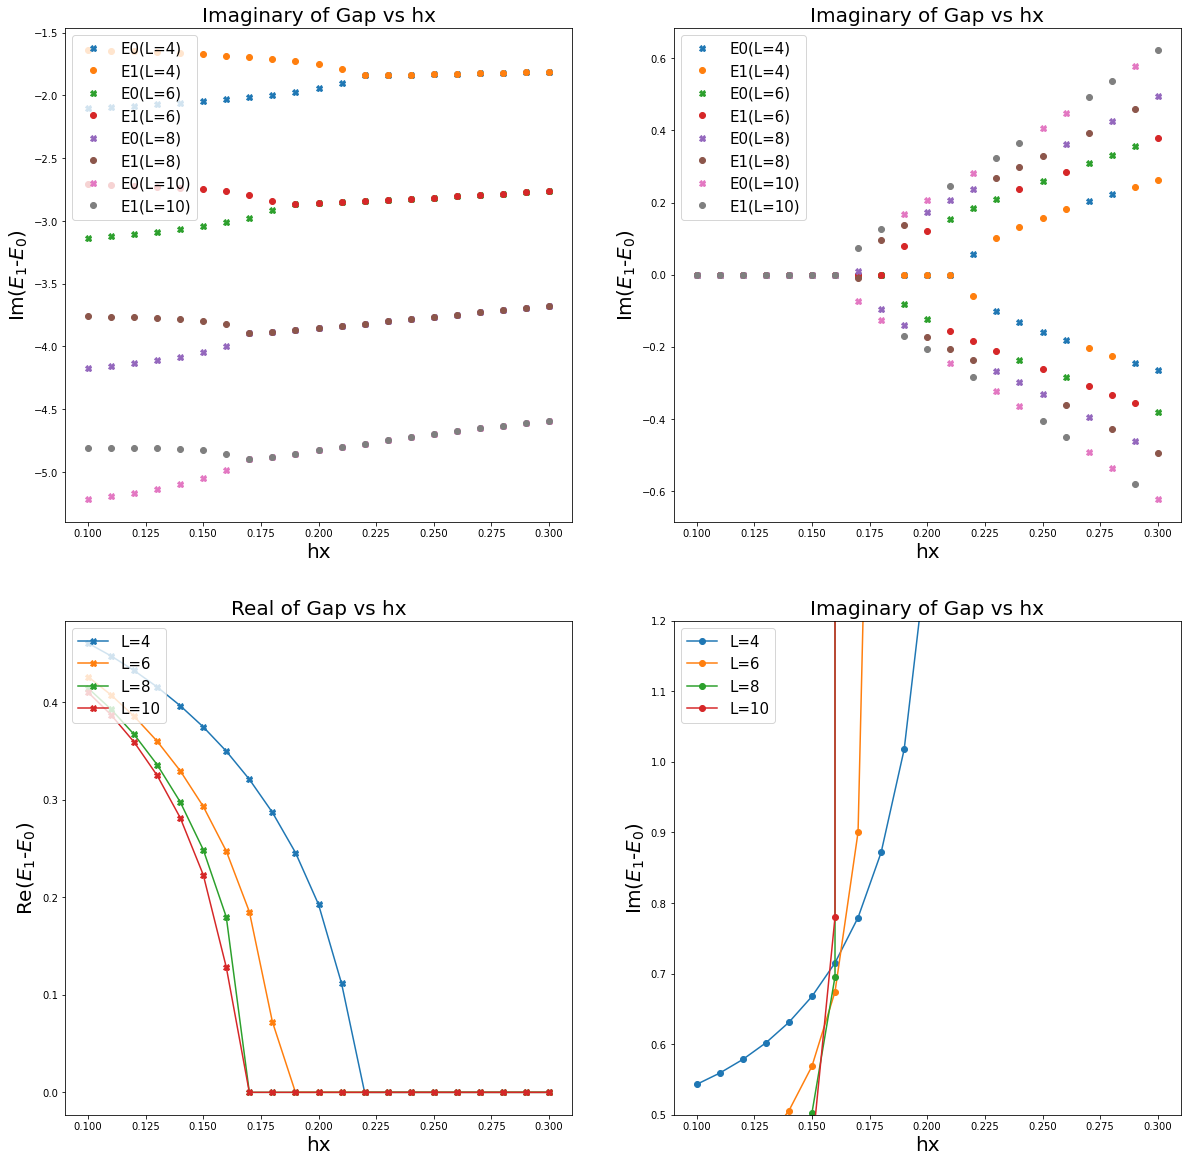

In [8]:
fig, ax = plt.subplots(2,2,figsize=(20,20))
for l in range(len(Llist)):
    L = Llist[l]
    ax[1][0].plot(hx[:],Gap[l,:], "-X", label = "L=%d" %L)
    ax[1][0].set_title("Real of Gap vs hx", fontsize = 20)
    ax[1][0].set_ylabel("Re($E_1$-$E_0$)", fontsize = 20)
    ax[1][0].set_xlabel("hx", fontsize = 20)
    ax[1][0].legend(loc = "upper left", fontsize=15)

    ax[0][0].plot(hx[:],np.real(E0[l,:]), "X", label = "E0(L=%d)" %L)
    ax[0][0].plot(hx[:],np.real(E1[l,:]), "o", label = "E1(L=%d)" %L)
    ax[0][0].set_title("Imaginary of Gap vs hx", fontsize = 20)
    ax[0][0].set_ylabel("Im($E_1$-$E_0$)", fontsize = 20)
    ax[0][0].set_xlabel("hx", fontsize = 20)
    ax[0][0].legend(loc = "upper left", fontsize=15)

    ax[0][1].plot(hx[:],np.imag(E0[l,:]), "X", label = "E0(L=%d)" %L)
    ax[0][1].plot(hx[:],np.imag(E1[l,:]), "o", label = "E1(L=%d)" %L)
    ax[0][1].set_title("Imaginary of Gap vs hx", fontsize = 20)
    ax[0][1].set_ylabel("Im($E_1$-$E_0$)", fontsize = 20)
    ax[0][1].set_xlabel("hx", fontsize = 20)
    ax[0][1].legend(loc = "upper left", fontsize=15)

    ax[1][1].plot(hx[:],lamda[l,:], "-o", label = "L=%d" %L)
    ax[1][1].set_title("Imaginary of Gap vs hx", fontsize = 20)
    ax[1][1].set_ylabel("Im($E_1$-$E_0$)", fontsize = 20)
    ax[1][1].set_xlabel("hx", fontsize = 20)
    ax[1][1].legend(loc = "upper left", fontsize=15)
    ax[1][1].set_ylim([0.5,1.2])
    
plt.show()

## Real Hamiltoian Using Sparse

### Calculation

In [14]:
Llist = np.linspace(4,10,(10-4)//2 + 1,dtype = int)
print(Llist)
hz = np.linspace(0,1,51)
E0 = np.zeros((len(Llist),len(hz)))
E1 = np.zeros((len(Llist),len(hz)))
# entropy = np.zeros((len(Llist),len(Llist)+1,len(hz)))
entropy = []
entropy_tensor = []

np.zeros((len(Llist),len(Llist) + 1))
gap = np.zeros((len(Llist),len(hz)))
lamda = np.zeros((len(Llist),len(hz)))
SzE = np.zeros((len(Llist),len(hz)))
SxE = np.zeros((len(Llist),len(hz)))


# fig, ax = plt.subplots(figsize=(16,16))
for l in range(len(Llist)):
    L = Llist[l]
    print("L:",L)
    entropy.append(np.zeros((L+1,len(hz))))
    entropy_tensor.append(np.zeros((L+1,len(hz))))
    for hz_i in range(len(hz)):

        SHtot, Sztot, Szlist, Sxtot, Sxlist = sparseHamiltonain(L,sparseSx,sparseSy,sparseSz,sparseI,1,0,hz[hz_i])
        ee, Sv = sparse.linalg.eigsh(SHtot,which="SA")
        ex, Svx = sparse.linalg.eigsh(SHtot + 0.01*Sxtot,which="SA")

        index = np.argsort(ee)
        ee = sorted(ee)

        E0[l,hz_i] = ee[0]/L
        E1[l,hz_i] = ee[1]/L
        gap[l,hz_i] = ee[1] - ee[0]
        lamda[l,hz_i] = 1/gap[l,hz_i]/L
        SzE[l,hz_i] = Sv[:,index[0]] @ Szlist[0] @ Sv[:,index[0]] 
        SxE[l,hz_i] = Svx[:,index[0]] @ Sxlist[0] @ Svx[:,index[0]] 

        Na = np.linspace(0,L,L+1,dtype = int)
        for na in range(len(Na)):
            # rv = np.reshape(Sv[:,0], (2**Na[na],2**(L-Na[na])))
            # s = np.linalg.svd(rv,  compute_uv=False)

            tensorshape = []
            for L_i in range(L):
                tensorshape.append(2)
            Ashape = []
            dotAxes = np.linspace(0,L-1,L,dtype=int)
            dotAxes=dotAxes[na:L]
            # print(dotAxes)
            if((na == 0) | (na == L+1)):
                entropy_tensor[l][na,hz_i] = 0
            else:
                Ashape = (2**(na),2**((na)))
                eigntensor = np.reshape(Sv[:,0],tensorshape)
                eigntensor1 = np.copy(eigntensor)
                Atensor = np.reshape(np.tensordot(eigntensor,eigntensor1,axes=(dotAxes,dotAxes)),Ashape)
                singVlue, singVec = la.eigh(Atensor)
                for svalue in singVlue:
                    entropy_tensor[l][na,hz_i] = entropy_tensor[l][na,hz_i] - np.abs(svalue)*np.log(np.abs(svalue))

            # for svalue in s:
            #     entropy[l][na,hz_i] = entropy[l][na,hz_i] - (svalue)*(svalue)*np.log(svalue*svalue)


[ 4  6  8 10]
L: 4
L: 6
L: 8
L: 10


/tmp/ipykernel_11778/336207252.py:35: RuntimeWarning: divide by zero encountered in double_scalars
  lamda[l,hz_i] = 1/gap[l,hz_i]/L


In [13]:
Llist = np.linspace(4,10,(10-4)//2 + 1,dtype = int)
print(Llist)
hz = np.linspace(0,1,51)
E0 = np.zeros((len(Llist),len(hz)))
E1 = np.zeros((len(Llist),len(hz)))
# entropy = np.zeros((len(Llist),len(Llist)+1,len(hz)))
entropy = []
entropy_tensor = []

np.zeros((len(Llist),len(Llist) + 1))
gap = np.zeros((len(Llist),len(hz)))
lamda = np.zeros((len(Llist),len(hz)))
SzE = np.zeros((len(Llist),len(hz)))
SxE = np.zeros((len(Llist),len(hz)))


# fig, ax = plt.subplots(figsize=(16,16))
for l in range(len(Llist)):
    L = Llist[l]
    print("L:",L)
    entropy.append(np.zeros((L+1,len(hz))))
    entropy_tensor.append(np.zeros((L+1,len(hz))))
    for hz_i in range(len(hz)):

        SHtot, Sztot, Szlist, Sxtot, Sxlist = sparseHamiltonain(L,sparseSx,sparseSy,sparseSz,sparseI,1,0,hz[hz_i])
        ee, Sv = sparse.linalg.eigsh(SHtot,which="SA")
        ex, Svx = sparse.linalg.eigsh(SHtot + 0.01*Sxtot,which="SA")

        index = np.argsort(ee)
        ee = sorted(ee)

        E0[l,hz_i] = ee[0]/L
        E1[l,hz_i] = ee[1]/L
        gap[l,hz_i] = ee[1] - ee[0]
        lamda[l,hz_i] = 1/gap[l,hz_i]/L
        SzE[l,hz_i] = Sv[:,index[0]] @ Szlist[0] @ Sv[:,index[0]] 
        SxE[l,hz_i] = Svx[:,index[0]] @ Sxlist[0] @ Svx[:,index[0]] 

        Na = np.linspace(0,L,L+1,dtype = int)
        for na in range(len(Na)):
            rv = np.reshape(Sv[:,0], (2**Na[na],2**(L-Na[na])))
            s = np.linalg.svd(rv,  compute_uv=False)

            # tensorshape = []
            # for L_i in range(L):
            #     tensorshape.append(2)
            # Ashape = []
            # dotAxes = np.linspace(0,L-1,L,dtype=int)
            # dotAxes=dotAxes[na:L]
            # # print(dotAxes)
            # if((na == 0) | (na == L+1)):
            #     entropy_tensor[l][na,hz_i] = 0
            # else:
            #     Ashape = (2**(na),2**((na)))
            #     eigntensor = np.reshape(Sv[:,0],tensorshape)
            #     eigntensor1 = np.copy(eigntensor)
            #     Atensor = np.reshape(np.tensordot(eigntensor,eigntensor1,axes=(dotAxes,dotAxes)),Ashape)
            #     singVlue, singVec = la.eigh(Atensor)
            #     for svalue in singVlue:
            #         entropy_tensor[l][na,hz_i] = entropy_tensor[l][na,hz_i] - np.abs(svalue)*np.log(np.abs(svalue))

            for svalue in s:
                entropy[l][na,hz_i] = entropy[l][na,hz_i] - (svalue)*(svalue)*np.log(svalue*svalue)


[ 4  6  8 10]
L: 4
L: 6
L: 8
L: 10


/tmp/ipykernel_11778/1069783207.py:35: RuntimeWarning: divide by zero encountered in double_scalars
  lamda[l,hz_i] = 1/gap[l,hz_i]/L


In [11]:
for i in range(100):
    SHtot, Sztot, Szlist, Sxtot, Sxlist = sparseHamiltonain(14,sparseSx,sparseSy,sparseSz,sparseI,1,0,0.4)
    ee, Sv = sparse.linalg.eigsh(SHtot,which="SA")
    Na = np.linspace(0,14,14+1,dtype = int)
    for na in range(len(Na)):
        rv = np.reshape(Sv[:,0], (2**Na[na],2**(14-Na[na])))
        s = np.linalg.svd(rv,  compute_uv=False)


In [12]:
for i in range(100):
    SHtot, Sztot, Szlist, Sxtot, Sxlist = sparseHamiltonain(14,sparseSx,sparseSy,sparseSz,sparseI,1,0,0.4)
    ee, Sv = sparse.linalg.eigsh(SHtot,which="SA")
    Na = np.linspace(0,14,14+1,dtype = int)
    for na in range(len(Na)):
        rv = np.reshape(Sv[:,0], (2**Na[na],2**(14-Na[na])))
        us, ss, vh = np.linalg.svd(rv, full_matrices=True)


KeyboardInterrupt: 

In [ ]:
SHtot, Sztot, Szlist, Sxtot, Sxlist = sparseHamiltonain(14,sparseSx,sparseSy,sparseSz,sparseI,1,0,0.4)
ee, Sv = sparse.linalg.eigsh(SHtot,which="SA")
ex, Svx = sparse.linalg.eigsh(SHtot + 0.01*Sxtot,which="SA")

index = np.argsort(ee)
ee = sorted(ee)

E0[l,hz_i] = ee[0]/L
E1[l,hz_i] = ee[1]/L
gap[l,hz_i] = ee[1] - ee[0]
lamda[l,hz_i] = 1/gap[l,hz_i]/L
SzE[l,hz_i] = Sv[:,index[0]] @ Szlist[0] @ Sv[:,index[0]] 
SxE[l,hz_i] = Svx[:,index[0]] @ Sxlist[0] @ Svx[:,index[0]] 

Na = np.linspace(0,L,L+1,dtype = int)
for na in range(len(Na)):
    rv = np.reshape(Sv[:,0], (2**Na[na],2**(L-Na[na])))
    s = np.linalg.svd(rv,  compute_uv=False)

    tensorshape = []
    for L_i in range(L):
        tensorshape.append(2)
    Ashape = []
    dotAxes = np.linspace(0,L-1,L,dtype=int)
    dotAxes=dotAxes[na:L]
    # print(dotAxes)
    if((na == 0) | (na == L+1)):
        entropy_tensor[l][na,hz_i] = 0
    else:
        Ashape = (2**(na),2**((na)))
        eigntensor = np.reshape(Sv[:,0],tensorshape)
        eigntensor1 = np.copy(eigntensor)
        Atensor = np.reshape(np.tensordot(eigntensor,eigntensor1,axes=(dotAxes,dotAxes)),Ashape)
        singVlue, singVec = la.eigh(Atensor)
        for svalue in singVlue:
            entropy_tensor[l][na,hz_i] = entropy_tensor[l][na,hz_i] - np.abs(svalue)*np.log(np.abs(svalue))

    for svalue in s:
        entropy[l][na,hz_i] = entropy[l][na,hz_i] - (svalue)*(svalue)*np.log(svalue*svalue)

### Data Plot

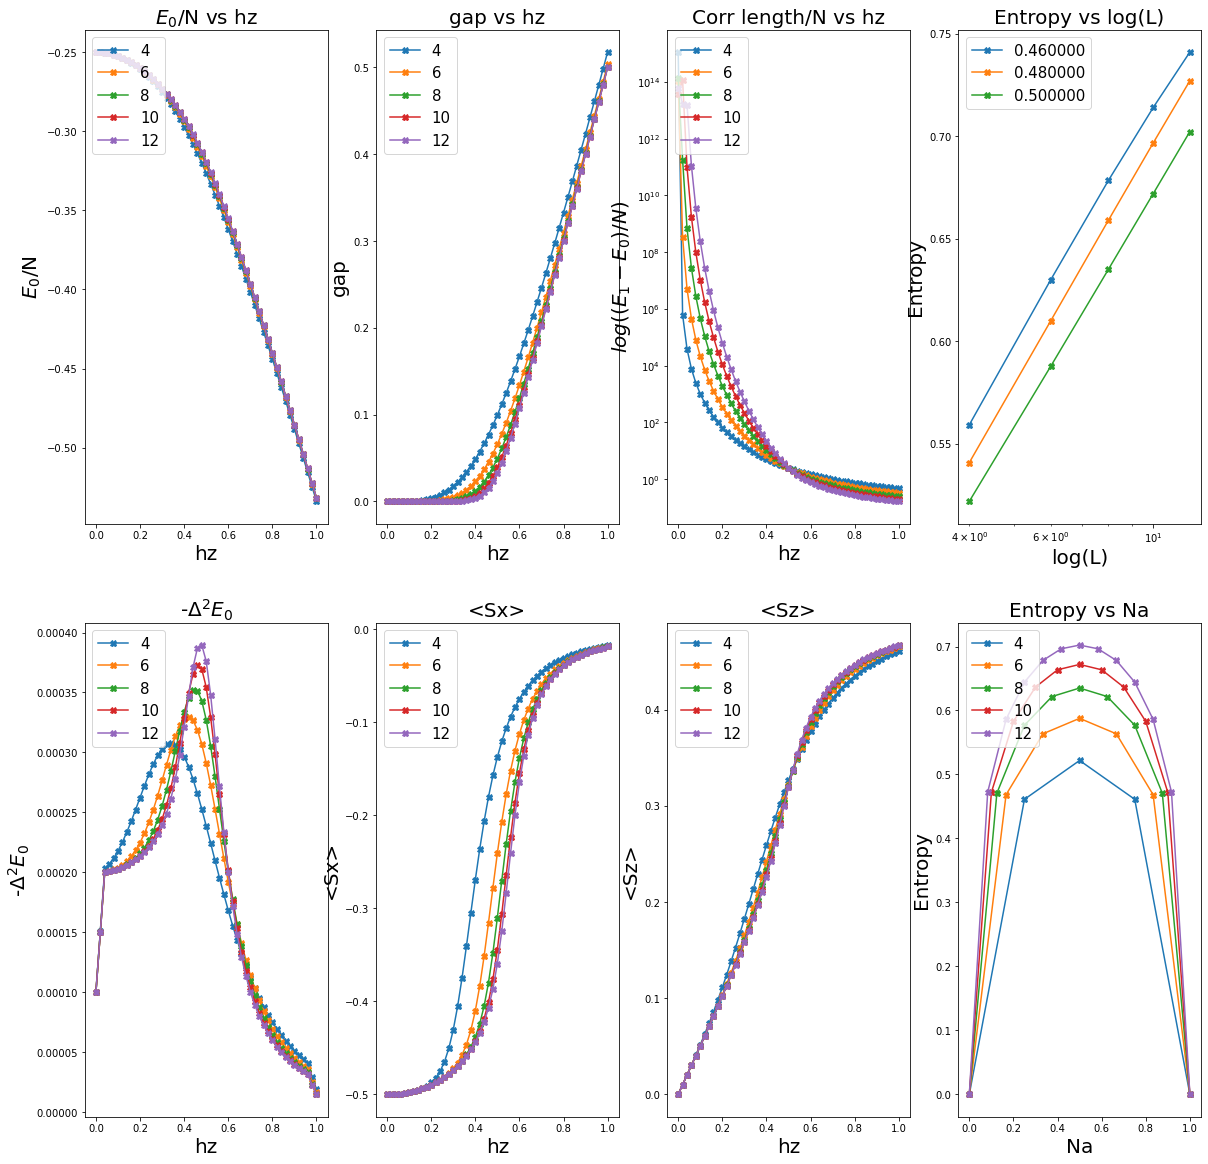

In [10]:
fig, ax = plt.subplots(2,4,figsize=(20,20))
entropyForAsize = np.zeros((len(Llist),len(hz)))
entropyForAsize1 = np.zeros((len(Llist),len(hz)))
for l in range(len(Llist)):
    L = Llist[l]
    ax[0][0].plot(hz[:],E0[l,:], "-X", label = "%d" %L)
    ax[0][0].set_title("$E_0$/N vs hz", fontsize = 20)
    ax[0][0].set_ylabel("$E_0$/N", fontsize = 20)
    ax[0][0].set_xlabel("hz", fontsize = 20)
    ax[0][0].legend(loc = "upper left", fontsize=15)

    ax[0][1].plot(hz[:],gap[l,:], "-X", label = "%d" %L)
    ax[0][1].set_title("gap vs hz", fontsize = 20)
    ax[0][1].set_ylabel("gap", fontsize = 20)
    ax[0][1].set_xlabel("hz", fontsize = 20)
    ax[0][1].legend(loc = "upper left", fontsize=15)

    ax[0][2].plot(hz[:],lamda[l,:], "-X", label = "%d" %L)
    ax[0][2].set_title("Corr length/N vs hz", fontsize = 20)
    ax[0][2].legend(loc = "upper left", fontsize=15)
    ax[0][2].set_ylabel("$log((E_1-E_0)/N)$", fontsize = 20)
    ax[0][2].set_xlabel("hz", fontsize = 20)
    ax[0][2].set_yscale('log')

    ax[1][0].plot(hz[:], -np.gradient(np.gradient(E0[l,:])), "-X", label = "%d" %L)
    ax[1][0].set_title("-$\Delta^2E_0$", fontsize = 20)
    ax[1][0].set_ylabel("-$\Delta^2E_0$", fontsize = 20)
    ax[1][0].set_xlabel("hz", fontsize = 20)
    ax[1][0].legend(loc = "upper left", fontsize=15)

    ax[1][1].plot(hz[:], SxE[l,:], "-X", label = "%d" %L)
    ax[1][1].set_title("<Sx>", fontsize = 20)
    ax[1][1].set_ylabel("<Sx>", fontsize = 20)
    ax[1][1].set_xlabel("hz", fontsize = 20)
    ax[1][1].legend(loc = "upper left", fontsize=15)

    ax[1][2].plot(hz[:], SzE[l,:], "-X", label = "%d" %L)
    ax[1][2].set_title("<Sz>", fontsize = 20)
    ax[1][2].set_ylabel("<Sz>", fontsize = 20)
    ax[1][2].set_xlabel("hz", fontsize = 20)
    ax[1][2].legend(loc = "upper left", fontsize=15)

    for h in range(len(hz)):
        entropyForAsize[l,h] = entropy[l][Llist[l]//2,h]
    # for h in range(len(hz)):
    #     entropyForAsize1[l,h] = entropy1[l][Llist[l]//2,h]


for hz_i in range(len(hz[0:(len(hz)+1)//2])):
    if(hz_i >= (len(hz)-1)//2 - 2):
        ax[0][3].plot(Llist[:],entropyForAsize[:,hz_i], "-X", label = "%f" %(hz[hz_i]))
        ax[0][3].set_ylabel("Entropy", fontsize = 20)
        ax[0][3].set_xlabel("log(L)", fontsize = 20)
        ax[0][3].set_title("Entropy vs log(L)", fontsize = 20)
        ax[0][3].legend(loc = "upper left", fontsize=15)
        ax[0][3].set_xscale('log')
    
# for l in range(len(Llist)):
#     Na = np.linspace(max(Llist)//2 - Llist[l]//2,max(Llist)//2 + Llist[l]//2,Llist[l]+1)
#     ax[1][3].plot(Na[:],entropy[l][:,(len(hz)+1)//2], "-X", label = "%d" %(Llist[l]))
#     ax[1][3].set_ylabel("Entropy", fontsize = 20)
#     ax[1][3].set_xlabel("Na", fontsize = 20)
#     ax[1][3].set_title("Entropy vs Na", fontsize = 20)
#     ax[1][3].legend(loc = "upper left", fontsize=15)

for l in range(len(Llist)):
    Na = np.linspace(max(Llist)//2 - Llist[l]//2,max(Llist)//2 + Llist[l]//2,Llist[l]+1)
    SNa = []
    for i in range(len(Na)):
        SNa.append((Na[i]-Na[0])/(Na[-1]-Na[0]))
    ax[1][3].plot(SNa[:],entropy[l][:,hz_i], "-X", label = "%d" %(Llist[l]))
    ax[1][3].set_ylabel("Entropy", fontsize = 20)
    ax[1][3].set_xlabel("Na", fontsize = 20)
    ax[1][3].set_title("Entropy vs Na", fontsize = 20)
    ax[1][3].legend(loc = "upper left", fontsize=15)


plt.show()

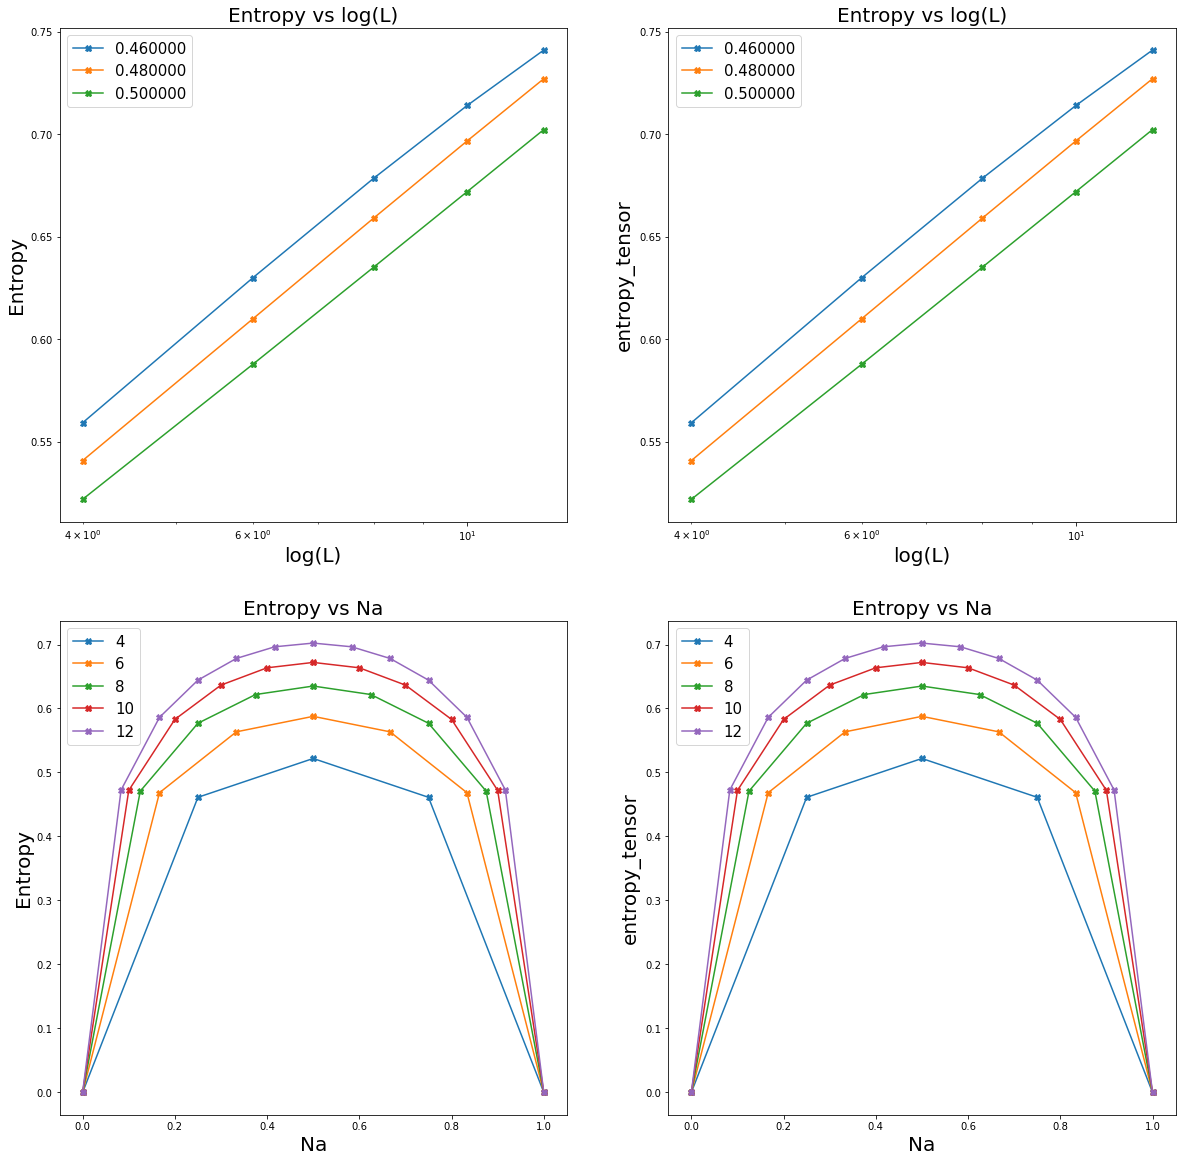

In [11]:
fig, ax = plt.subplots(2,2,figsize=(20,20))
entropyForAsize = np.zeros((len(Llist),len(hz)))
entropyForAsize_tensor = np.zeros((len(Llist),len(hz)))
for l in range(len(Llist)):
    L = Llist[l]
    for h in range(len(hz)):
        entropyForAsize[l,h] = entropy[l][Llist[l]//2,h]
    for h in range(len(hz)):
        entropyForAsize_tensor[l,h] = entropy_tensor[l][Llist[l]//2,h]

for hz_i in range(len(hz[0:(len(hz)+1)//2])):
    if(hz_i >= (len(hz)-1)//2 - 2):
        ax[0][0].plot(Llist[:],entropyForAsize[:,hz_i], "-X", label = "%f" %(hz[hz_i]))
        ax[0][0].set_ylabel("Entropy", fontsize = 20)
        ax[0][0].set_xlabel("log(L)", fontsize = 20)
        ax[0][0].set_title("Entropy vs log(L)", fontsize = 20)
        ax[0][0].legend(loc = "upper left", fontsize=15)
        ax[0][0].set_xscale('log')

for hz_i in range(len(hz[0:(len(hz)+1)//2])):
    if(hz_i >= (len(hz)-1)//2 - 2):
        ax[0][1].plot(Llist[:],entropyForAsize_tensor[:,hz_i], "-X", label = "%f" %(hz[hz_i]))
        ax[0][1].set_ylabel("entropy_tensor", fontsize = 20)
        ax[0][1].set_xlabel("log(L)", fontsize = 20)
        ax[0][1].set_title("Entropy vs log(L)", fontsize = 20)
        ax[0][1].legend(loc = "upper left", fontsize=15)
        ax[0][1].set_xscale('log')

for l in range(len(Llist)):
    Na = np.linspace(max(Llist)//2 - Llist[l]//2,max(Llist)//2 + Llist[l]//2,Llist[l]+1)
    SNa = []
    for i in range(len(Na)):
        SNa.append((Na[i]-Na[0])/(Na[-1]-Na[0]))
    ax[1][0].plot(SNa[:],entropy[l][:,hz_i], "-X", label = "%d" %(Llist[l]))
    ax[1][0].set_ylabel("Entropy", fontsize = 20)
    ax[1][0].set_xlabel("Na", fontsize = 20)
    ax[1][0].set_title("Entropy vs Na", fontsize = 20)
    ax[1][0].legend(loc = "upper left", fontsize=15)

for l in range(len(Llist)):
    Na = np.linspace(max(Llist)//2 - Llist[l]//2,max(Llist)//2 + Llist[l]//2,Llist[l]+1)
    SNa = []
    for i in range(len(Na)):
        SNa.append((Na[i]-Na[0])/(Na[-1]-Na[0]))
    ax[1][1].plot(SNa[:],entropy_tensor[l][:,hz_i], "-X", label = "%d" %(Llist[l]))
    ax[1][1].set_ylabel("entropy_tensor", fontsize = 20)
    ax[1][1].set_xlabel("Na", fontsize = 20)
    ax[1][1].set_title("Entropy vs Na", fontsize = 20)
    ax[1][1].legend(loc = "upper left", fontsize=15)

## Complex Hamiltonian using sparse

### Calculation

In [12]:
Llist = np.linspace(4,14,(14-4)//2+1,dtype = int)
print(Llist)
hx = np.linspace(0.1,0.25,31)
E0 = np.zeros((len(Llist),len(hx)),dtype=complex)
E1 = np.zeros((len(Llist),len(hx)),dtype=complex)
imGap = np.zeros((len(Llist),len(hx)))
lamda = np.zeros((len(Llist),len(hx)))
Gap = np.zeros((len(Llist),len(hx)))



for l in range(len(Llist)):
    L = Llist[l]
    for hx_i in range(len(hx)):
        SHtot, Sztot, Szlist, Sxtot, Sxlist = sparseHamiltonain(L,sparseSx,sparseSy,sparseSz,sparseI,1,hx[hx_i],1)
        ee, Sv = sparse.linalg.eigs(SHtot)
        ee= np.sort_complex(ee)
        E0[l,hx_i] = ee[0]
        E1[l,hx_i] = ee[1]
        Gap[l,hx_i] = np.real(ee[1] - ee[0])
        imGap[l,hx_i] = np.imag(ee[1] - ee[0])
        lamda[l,hx_i] = 1/np.real(ee[1] - ee[0])/L

[ 4  6  8 10 12 14]


/tmp/ipykernel_10566/478556398.py:22: RuntimeWarning: divide by zero encountered in double_scalars
  lamda[l,hx_i] = 1/np.real(ee[1] - ee[0])/L


### Data Plot

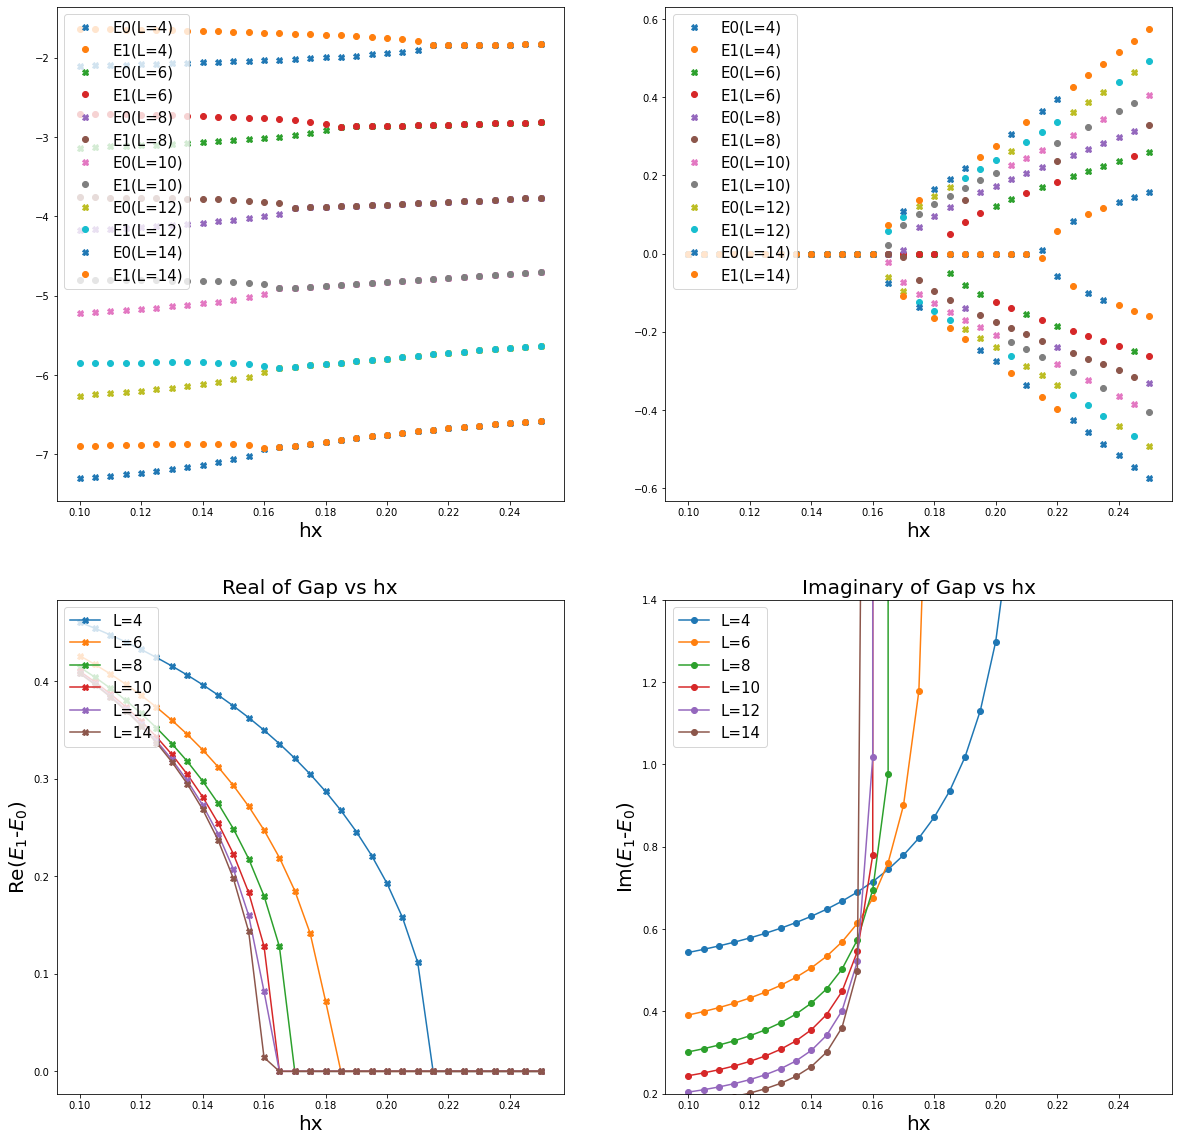

In [13]:
fig, ax = plt.subplots(2,2,figsize=(20,20))
for l in range(len(Llist)):
    L = Llist[l]
    ax[1][0].plot(hx[:],Gap[l,:], "-X", label = "L=%d" %L)
    ax[1][0].set_title("Real of Gap vs hx", fontsize = 20)
    ax[1][0].set_ylabel("Re($E_1$-$E_0$)", fontsize = 20)
    ax[1][0].set_xlabel("hx", fontsize = 20)
    ax[1][0].legend(loc = "upper left", fontsize=15)

    ax[0][0].plot(hx[:],np.real(E0[l,:]), "X", label = "E0(L=%d)" %L)
    ax[0][0].plot(hx[:],np.real(E1[l,:]), "o", label = "E1(L=%d)" %L)
    # ax[0][0].set_title("Imaginary of Gap vs hx", fontsize = 20)
    # ax[0][0].set_ylabel("Im($E_1$-$E_0$)", fontsize = 20)
    ax[0][0].set_xlabel("hx", fontsize = 20)
    ax[0][0].legend(loc = "upper left", fontsize=15)

    ax[0][1].plot(hx[:],np.imag(E0[l,:]), "X", label = "E0(L=%d)" %L)
    ax[0][1].plot(hx[:],np.imag(E1[l,:]), "o", label = "E1(L=%d)" %L)
    # ax[0][1].set_title("Imaginary of Gap vs hx", fontsize = 20)
    # ax[0][1].set_ylabel("Im($E_1$-$E_0$)", fontsize = 20)
    ax[0][1].set_xlabel("hx", fontsize = 20)
    ax[0][1].legend(loc = "upper left", fontsize=15)

    ax[1][1].plot(hx[:],lamda[l,:], "-o", label = "L=%d" %L)
    ax[1][1].set_title("Imaginary of Gap vs hx", fontsize = 20)
    ax[1][1].set_ylabel("Im($E_1$-$E_0$)", fontsize = 20)
    ax[1][1].set_xlabel("hx", fontsize = 20)
    ax[1][1].legend(loc = "upper left", fontsize=15)
    ax[1][1].set_ylim([0.2,1.4])
    
plt.show()

## Degenergy

### check degenercy

In [14]:
Htot, ztot, zlist, xtot, xlist = Hamiltonain(4, Sx, Sy, Sz, I, 1, 0, 0.5)

In [15]:
SHtot, Sztot, Szlist, Sxtot, Sxlist = sparseHamiltonain(4, sparseSx, sparseSy, sparseSz, sparseI, 1, 0, 0.5)

[[0]]


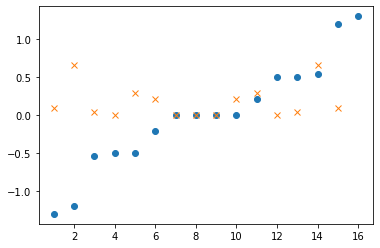

In [16]:
ee = la.eigvals(Htot)
sort_ee = np.sort(ee)
gap = np.zeros(len(ee)-1)
sort_gap = np.zeros(len(ee)-1)
block = []

for i in range(len(ee) - 1):
    gap[i] = sort_ee[i + 1] - sort_ee[i]

sort_gap = np.sort(gap)

numOfBlock = 0
block.append([])
block[0].append(0)

for i in range(len(ee)-1):
    if(gap[i] > gap[4]):
        numOfBlock = numOfBlock + 1
    # else:
    #     block.append([])
    #     numOfBlock = numOfBlock + 1

# np_ee = np.zeros(2**4)
# for i in range(len(ee)):
#     np_ee[i] = ee[i]
# ee = np.sort(ee)
plt.plot(np.linspace(1,len(sort_ee),len(sort_ee)),sort_ee,"o")
plt.plot(np.linspace(1,len(gap),len(gap)),gap,"x")
print(block)